In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv("ratings.csv")

In [3]:
print(movies.shape)
print(ratings.shape)

(10329, 3)
(105339, 4)


In [4]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
print(len(genres))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title)
movie_title=str(movie_title) 

20


In [8]:
genres

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [9]:
movie_title

'[\'Toy Story (1995)\', \'Jumanji (1995)\', \'Grumpier Old Men (1995)\', \'Waiting to Exhale (1995)\', \'Father of the Bride Part II (1995)\', \'Heat (1995)\', \'Sabrina (1995)\', \'Tom and Huck (1995)\', \'Sudden Death (1995)\', \'GoldenEye (1995)\', \'American President, The (1995)\', \'Dracula: Dead and Loving It (1995)\', \'Balto (1995)\', \'Nixon (1995)\', \'Cutthroat Island (1995)\', \'Casino (1995)\', \'Sense and Sensibility (1995)\', \'Four Rooms (1995)\', \'Ace Ventura: When Nature Calls (1995)\', \'Money Train (1995)\', \'Get Shorty (1995)\', \'Copycat (1995)\', \'Assassins (1995)\', \'Powder (1995)\', \'Leaving Las Vegas (1995)\', \'Othello (1995)\', \'Now and Then (1995)\', \'Persuasion (1995)\', \'City of Lost Children, The (Cité des enfants perdus, La) (1995)\', \'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)\', \'Dangerous Minds (1995)\', \'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)\', \'Wings of Courage (1995)\', \'Babe (1995)\', \'Carrington (1995)\', \'Dead Man 

In [10]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

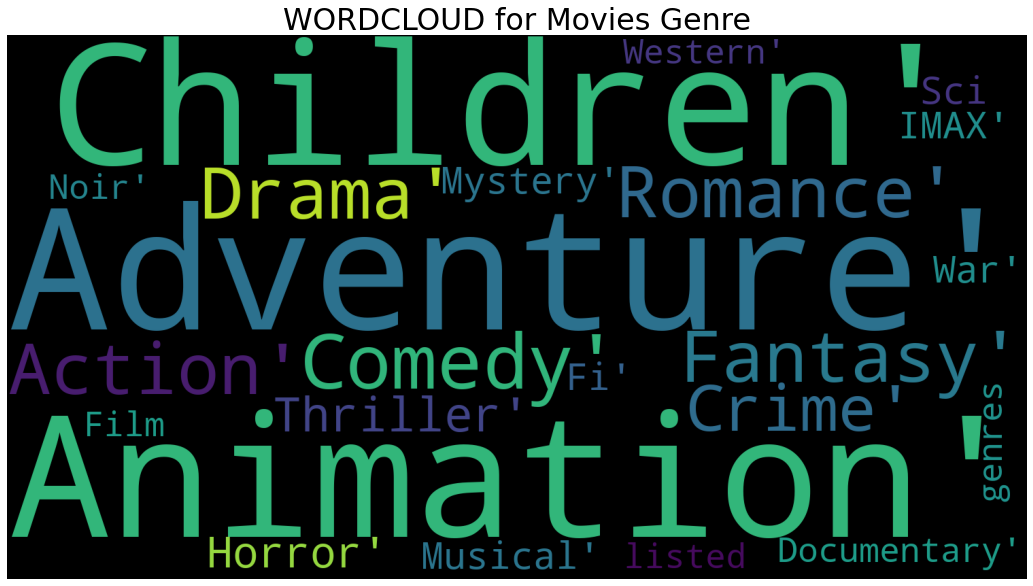

In [11]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

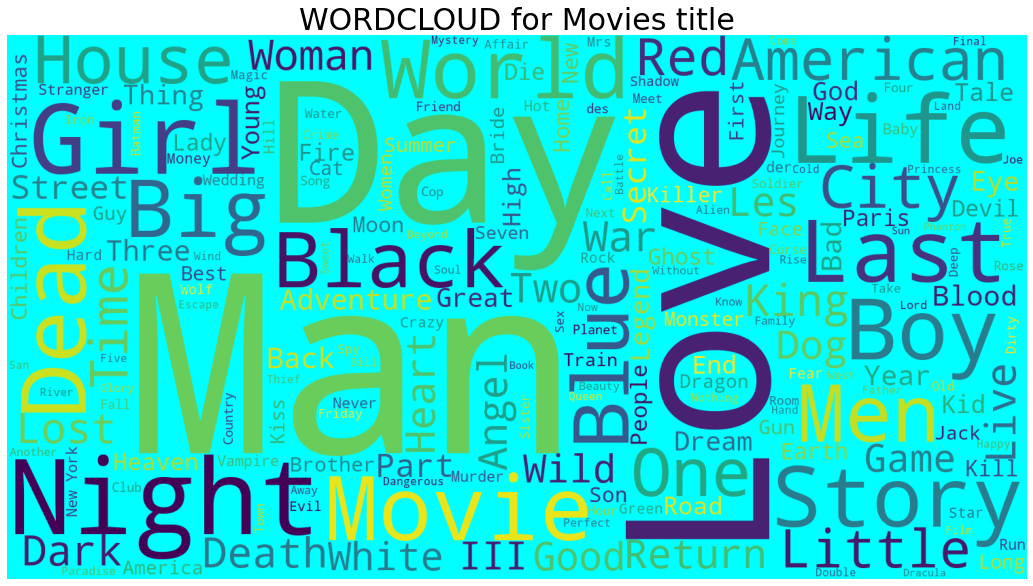

In [12]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [13]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [14]:
df.shape

(105339, 6)

In [15]:
df.rating.max()

5.0

In [16]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


In [17]:
idx=movies.nlargest(10,'movieId').index######Sikhlam
movies['genres'][movies['title']=='Shawshank Redemption, The (1994)']

279    Crime|Drama
Name: genres, dtype: object

In [18]:
movies['title'].iloc[idx]

10328    Marco Polo: One Hundred Eyes (2015)
10327                   The Big Short (2015)
10326         A Very Murray Christmas (2015)
10325             Le Grand Restaurant (1966)
10324          Cosmic Scrat-tastrophe (2015)
10323                           Creed (2015)
10322            Elämältä kaiken sain (    )
10321                   Bone Tomahawk (2015)
10320            The Measure of a Man (2015)
10319                          Circle (2015)
Name: title, dtype: object

In [19]:
high_rated

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


<BarContainer object of 20 artists>

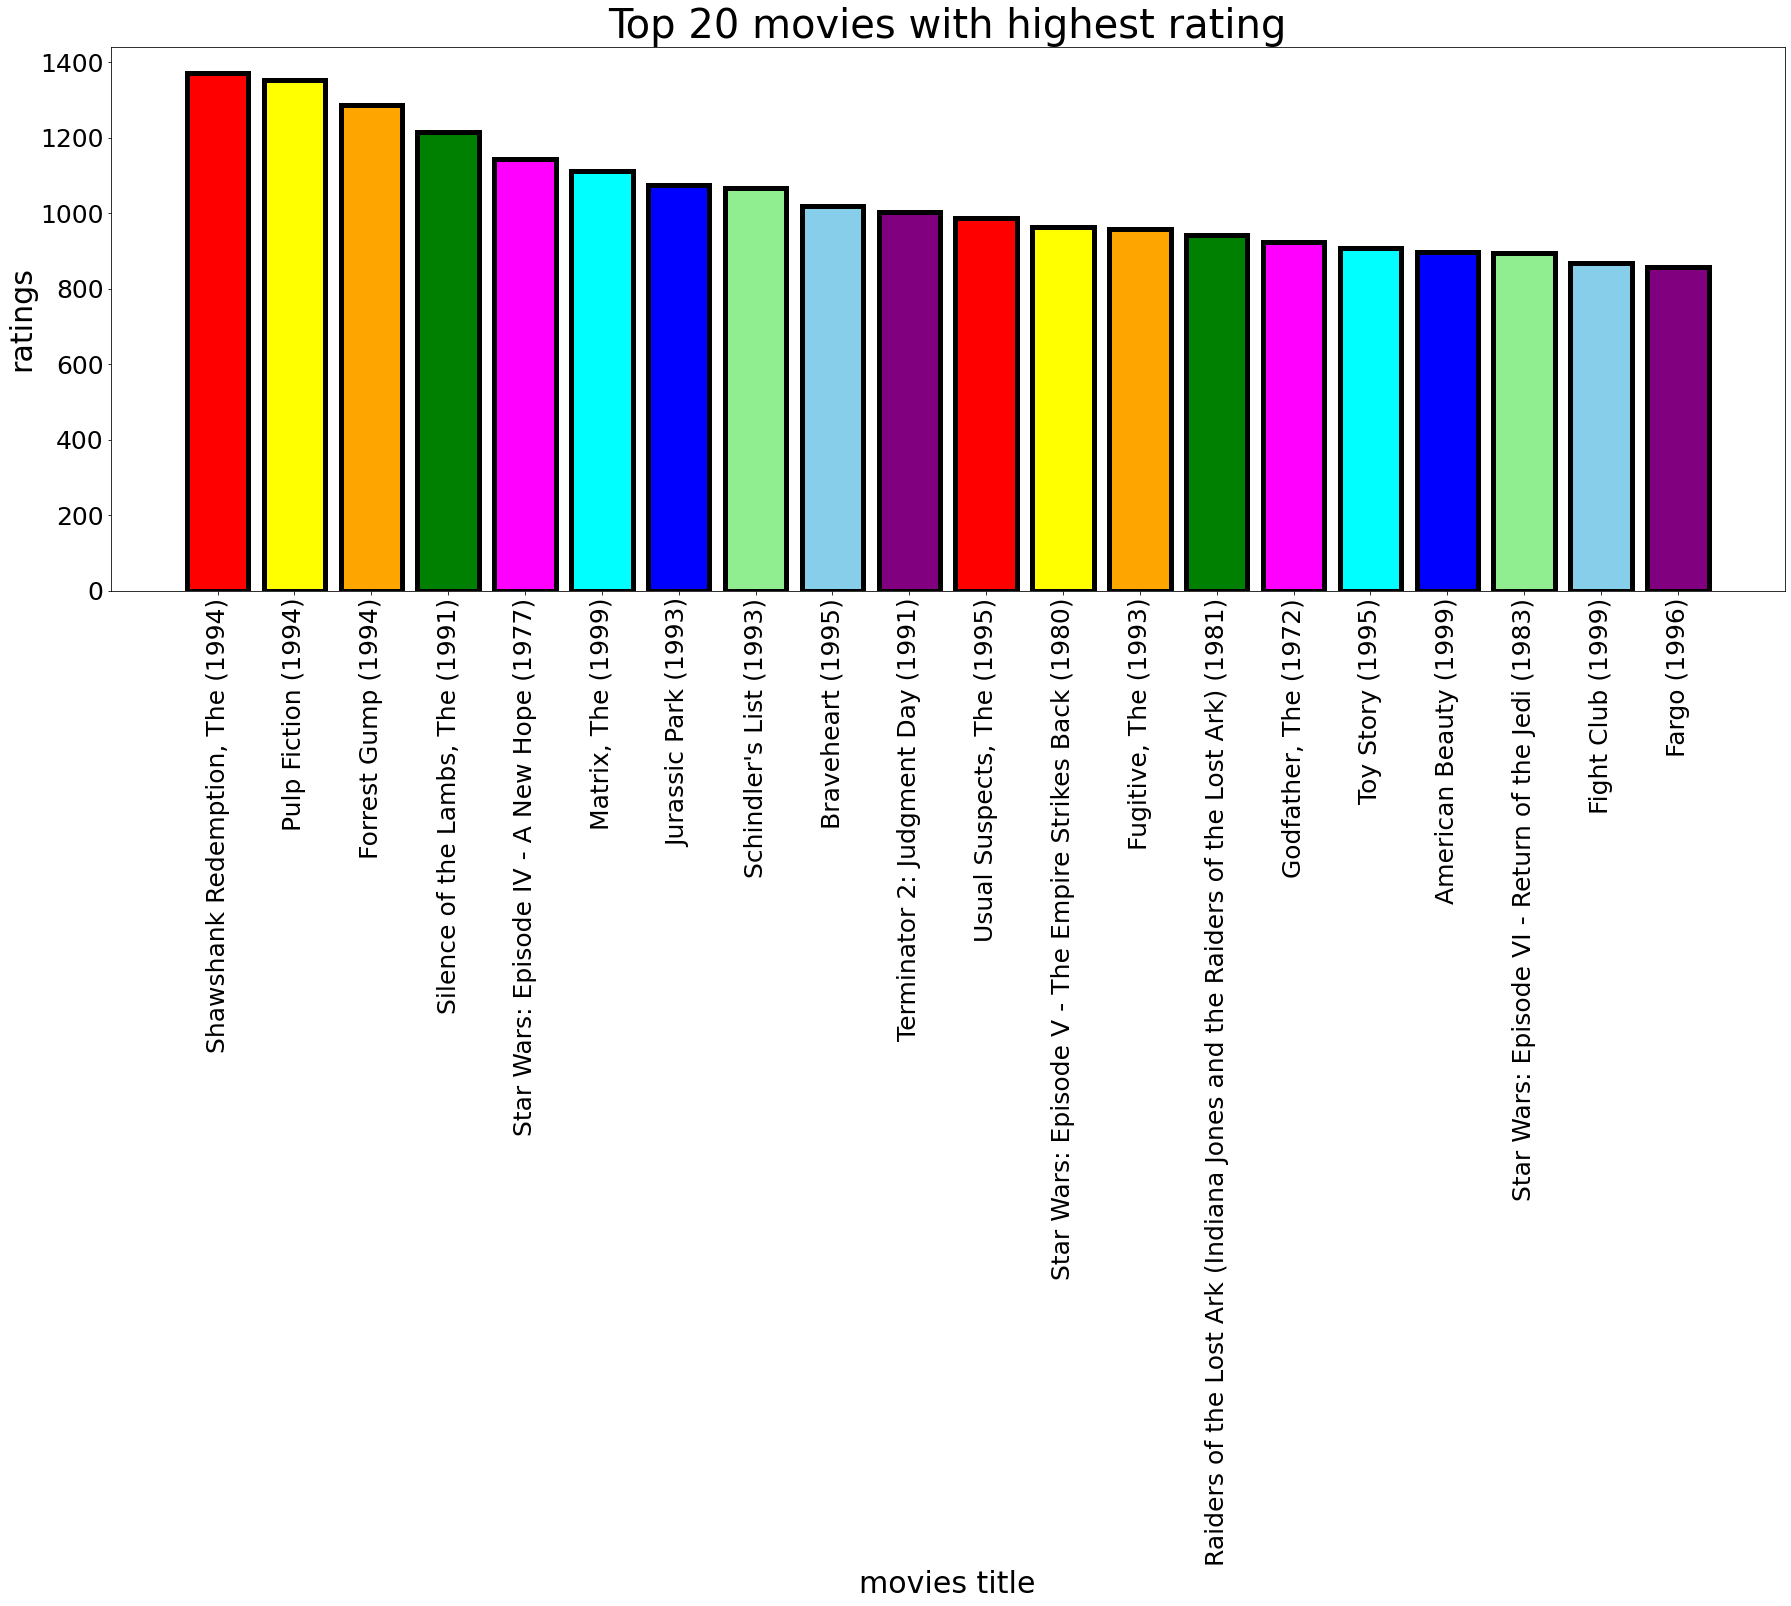

In [20]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=5,edgecolor='black',color=colors)

In [21]:
df2=df.groupby('title')[['rating']].count()#Koto Bar rating diyeche
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

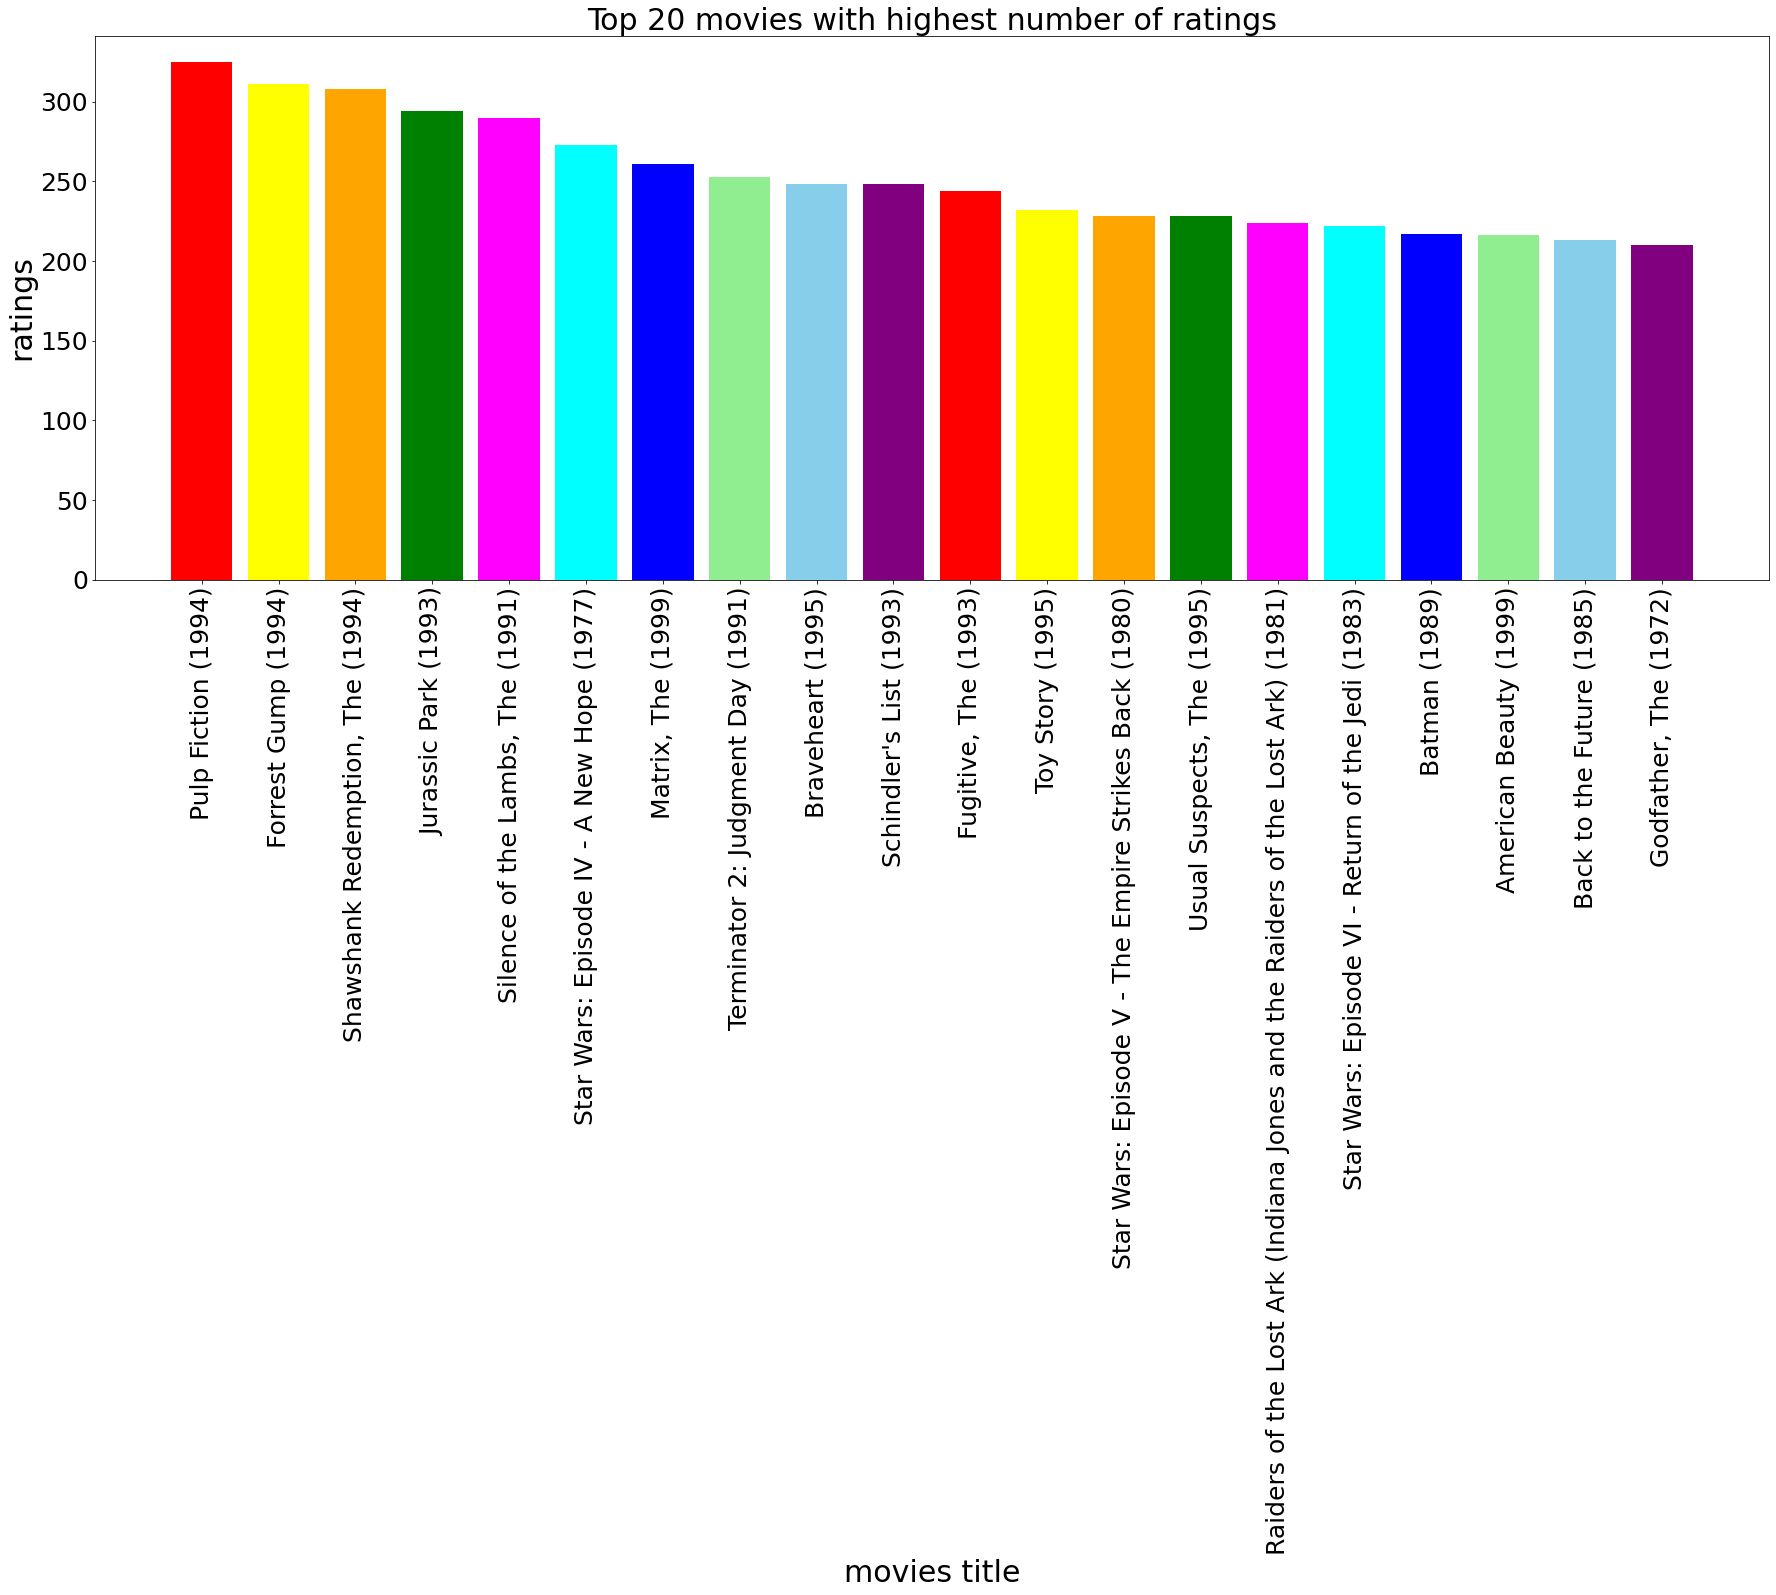

In [22]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)
plt.bar(rating_count_20.index,rating_count_20.rating,color=colors)

In [23]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [24]:
tfidf_matrix.toarray()

array([[0.        , 0.40410292, 0.53921623, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.50527236, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Why is TfidfVectorizer used?
It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [25]:
df.tail()

,userId,movieId,rating,timestamp,title,genres
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western
105338,668,148626,4.5,1451148148,The Big Short (2015),Drama


In [26]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,2.5,NaN,NaN,NaN,2.0,NaN,3.0,2.5,...,NaN,1.5,0.5,NaN,2.0,NaN,3.5,NaN,2.0,3.0


# Suppose a user wants to watch a movie similar to Toy Story (1995) then we can recommend the user by calculating the cosine similarity between Toy Story and other movies. So we have to first find the cosine similarity betw

In [27]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.79977247, 0.1589222 , ..., 0.2638368 , 0.        ,
        0.        ],
       [0.79977247, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1589222 , 0.        , 1.        , ..., 0.60235038, 0.        ,
        0.        ],
       ...,
       [0.2638368 , 0.        , 0.60235038, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [34]:
indices=pd.Series(movies.index,index=movies['title'])
indices
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    print(sim_scores)
    movie_indices = [i[0] for i in sim_scores]
    print("indices are...",movie_indices)
    return titles.iloc[movie_indices]

In [35]:
indices['Godzilla (1998)']

1460

In [36]:
indices=pd.Series(movies.index,index=movies['title'])
indices

title
Toy Story (1995)                           0
Jumanji (1995)                             1
Grumpier Old Men (1995)                    2
Waiting to Exhale (1995)                   3
Father of the Bride Part II (1995)         4
                                       ...  
Cosmic Scrat-tastrophe (2015)          10324
Le Grand Restaurant (1966)             10325
A Very Murray Christmas (2015)         10326
The Big Short (2015)                   10327
Marco Polo: One Hundred Eyes (2015)    10328
Length: 10329, dtype: int64

In [37]:
recommendations('Shawshank Redemption, The (1994)')

279
[(29, 0.9999999999999998), (35, 0.9999999999999998), (89, 0.9999999999999998), (105, 0.9999999999999998), (215, 0.9999999999999998), (217, 0.9999999999999998), (237, 0.9999999999999998), (252, 0.9999999999999998), (255, 0.9999999999999998), (279, 0.9999999999999998), (350, 0.9999999999999998), (358, 0.9999999999999998), (379, 0.9999999999999998), (662, 0.9999999999999998), (691, 0.9999999999999998), (695, 0.9999999999999998), (780, 0.9999999999999998), (881, 0.9999999999999998), (904, 0.9999999999999998), (974, 0.9999999999999998)]
indices are... [29, 35, 89, 105, 215, 217, 237, 252, 255, 279, 350, 358, 379, 662, 691, 695, 780, 881, 904, 974]


29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
35                               Dead Man Walking (1995)
89                               Hate (Haine, La) (1995)
105                Young Poisoner's Handbook, The (1995)
215                              The Glass Shield (1994)
217                            Heavenly Creatures (1994)
237                                 Little Odessa (1994)
252                              New Jersey Drive (1995)
255                            Once Were Warriors (1994)
279                     Shawshank Redemption, The (1994)
350                                 Jason's Lyric (1994)
358                                 Above the Rim (1994)
379                                 Carlito's Way (1993)
662                              American Buffalo (1996)
691                               Cyclo (Xich lo) (1995)
695                                Godfather, The (1972)
780                          Angel on My Shoulder (1946)
881                            

In [38]:
df1.index

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Til There Was You (1997)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)',
       ...
       '[REC] (2007)', '[REC]² (2009)', '[REC]³ 3 Génesis (2012)',
       'a/k/a Tommy Chong (2005)', 'eXistenZ (1999)',
       'loudQUIETloud: A Film About the Pixies (2006)', 'xXx (2002)',
       'xXx: State of the Union (2005)', '¡Three Amigos! (1986)',
       'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=10323)

In [39]:
df1

,rating
title,
'71 (2014),3.5
'Hellboy': The Seeds of Creation (2004),3.0
'Round Midnight (1986),2.5
'Til There Was You (1997),12.0
"'burbs, The (1989)",62.5
...,...
loudQUIETloud: A Film About the Pixies (2006),4.5
xXx (2002),71.0
xXx: State of the Union (2005),14.5
